In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV

#classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from  xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score,auc,confusion_matrix,classification_report





In [3]:
df=pd.read_csv("C:/Users/ADMIN/Desktop/projects_coding/industrial/copper.csv")


In [4]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00


In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
df.keys()

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [9]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

Text(0.5, 1.0, 'Before cleaning process')

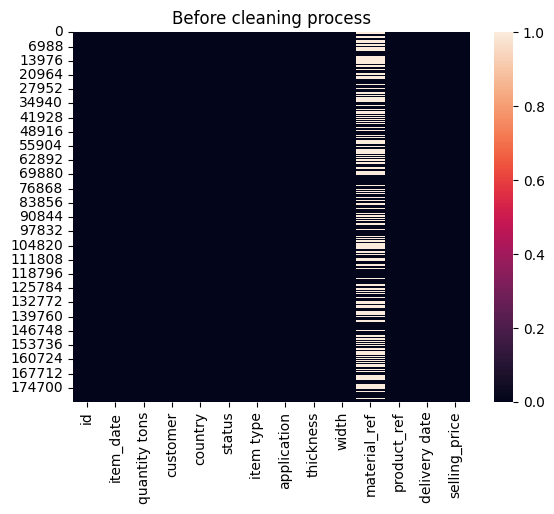

In [10]:
ax=sns.heatmap(df.isnull())
ax.set_title("Before cleaning process")

In [11]:
df1=df.copy()




In [12]:
df1.drop(['material_ref','id'],axis=1,inplace=True)

In [13]:
def datatype_convert():
    # to convert 'qualitytons' categorial to numeric replace with naN
    df1['quantity tons']=pd.to_numeric(df1['quantity tons'],errors='coerce' )
    # to 'item type' convert numeric using label encoding
    label_encoder=preprocessing.LabelEncoder()
    df1['item type']=label_encoder.fit_transform(df1['item type'])

    # 'status' convert categorial to numeric because model takes only numeric using label encoding
    label_encoder1=preprocessing.LabelEncoder()
    df1['status']=label_encoder1.fit_transform(df1['status'])

    #convert 'item_date','delivery date'float to date time format
    df1['item_date']=pd.to_datetime(df1['item_date'],format='%Y%m%d',errors='coerce')
    df1['delivery date']=pd.to_datetime(df1['delivery date'],format='%Y%m%d',errors='coerce')
    return df1


In [14]:
new=datatype_convert()

In [15]:
# check if it converted or not
new['item type'].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [16]:
new.isnull().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            0
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

array([[<Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'customer'}>,
        <Axes: title={'center': 'status'}>],
       [<Axes: title={'center': 'application'}>,
        <Axes: title={'center': 'thickness'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'quantity tons'}>, <Axes: >, <Axes: >]],
      dtype=object)

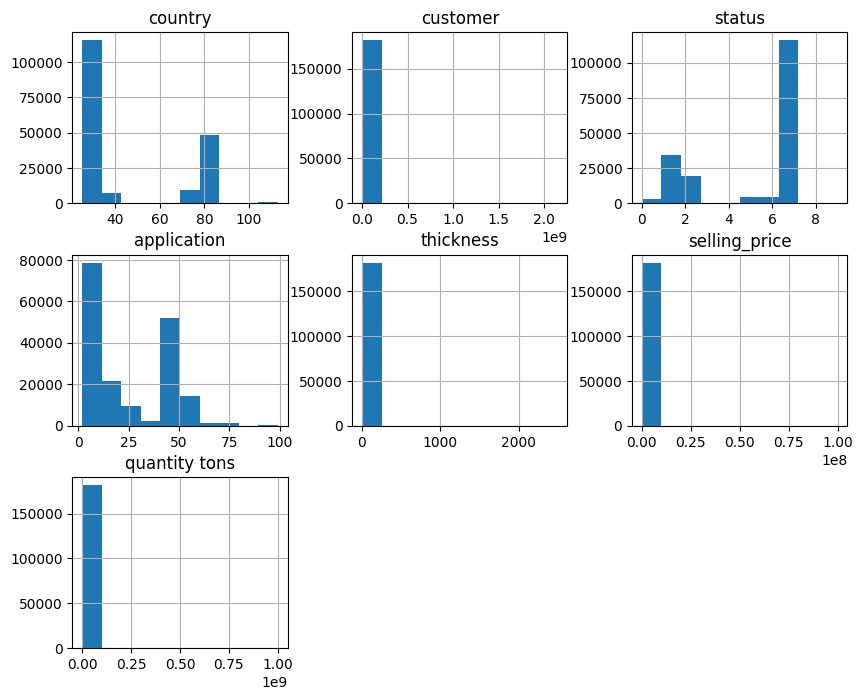

In [17]:
#plot histogram to check distribution of data
features=['country','customer','status','application','thickness','selling_price','quantity tons']
new[features].hist(figsize=(10,8))

In [18]:
def fill_missing():
    # In those plots thedistribution are skewed  so that we have fill the missing values,these features are numeric so we use median.
    new['country'].fillna(new['country'].median(),inplace=True)
    new['customer'].fillna(new['customer'].median(),inplace=True)
    new['application'].fillna(new['application'].median(),inplace=True)
    new['thickness'].fillna(new['thickness'].median(),inplace=True)
    new['selling_price'].fillna(new['selling_price'].median(),inplace=True)
    new['quantity tons'].fillna(new['quantity tons'].median(),inplace=True)

    # this feature is categorical so we use mode
    new['status'].fillna(new['status'].mode().iloc[0],inplace=True)
    # handle missing data to datetime feature we use mode.
    new['item_date'].fillna(new['item_date'].mode().iloc[0],inplace=True)
    new['delivery date'].fillna(new['delivery date'].mode().iloc[0],inplace=True)
    return new

In [19]:
cleaned_data=fill_missing()

In [20]:
#let's check the data is cleaned or not
cleaned_data.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

Text(0.5, 1.0, 'After cleaning process')

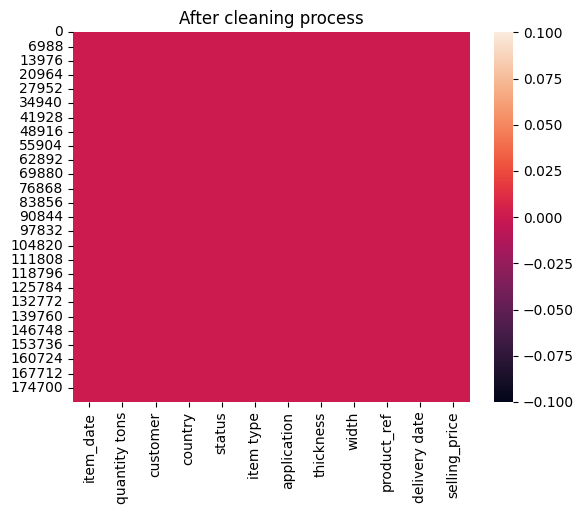

In [21]:
ax=sns.heatmap(cleaned_data.isnull())
ax.set_title("After cleaning process")

In [22]:
print(cleaned_data.dtypes)

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                    int32
item type                 int32
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object


In [23]:
# check the distribution of data
def plot(df2,column):
    df2 = df2.dropna(subset=[column])
    plt.figure(figsize=(14,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2, x=column)
    plt.title(f'box plot for {column}')
    print(f'{column}')
    print("skew:",{df2[column].skew()})

    plt.subplot(1,3,2)
    sns.histplot(data=df2, x=column, kde=True, bins=50)
    plt.title(f'Distribution plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2, x=column)
    plt.title(f'violin plot for {column}')
    plt.show()


quantity tons
skew: {424.69081645105615}


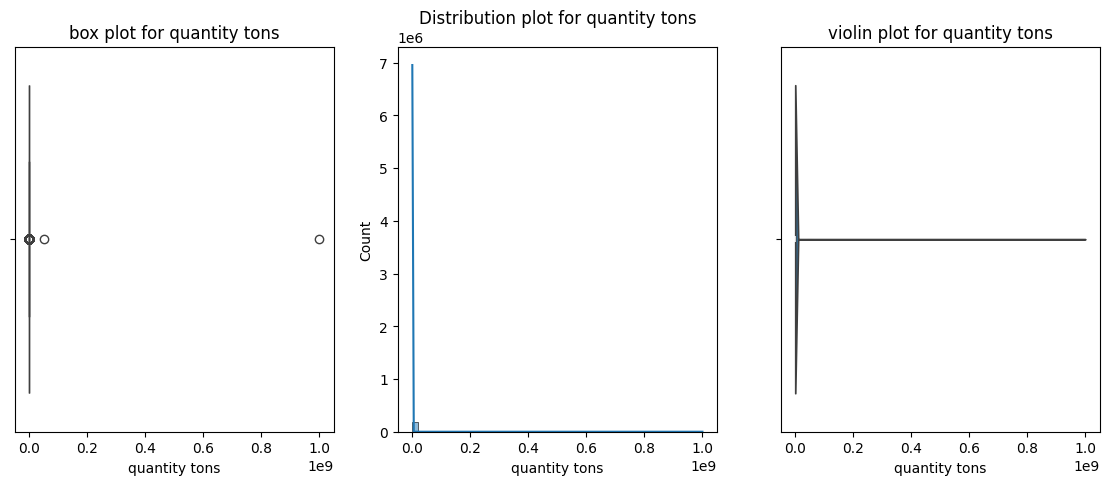

customer
skew: {86.98530835413473}


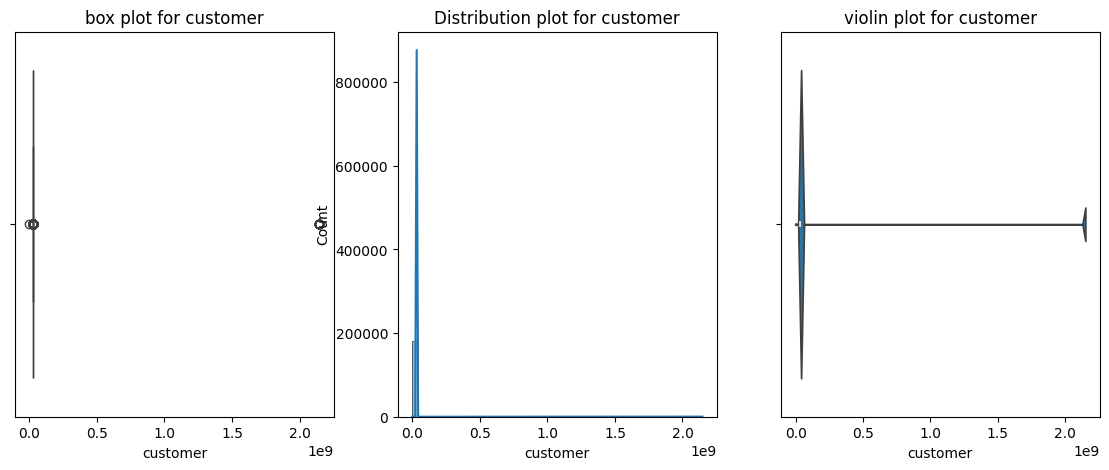

country
skew: {0.7538348729685946}


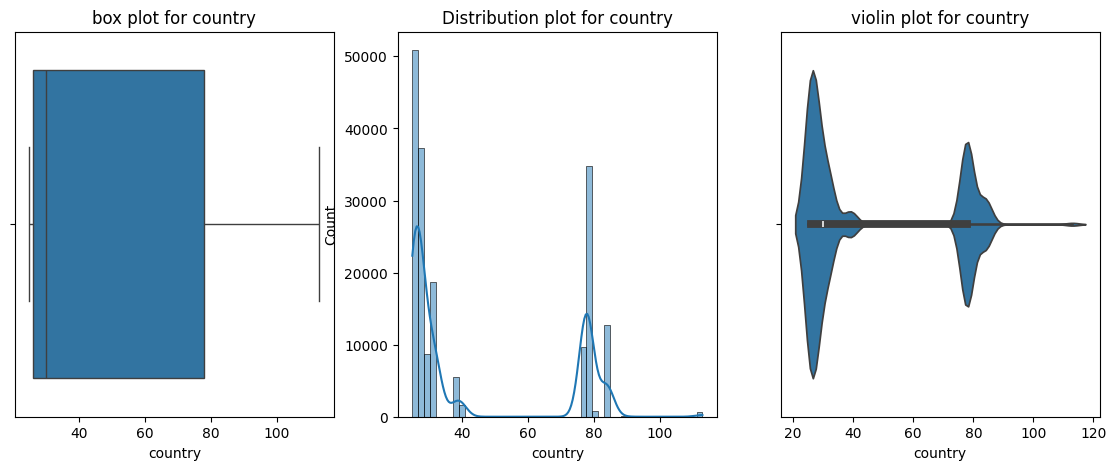

status
skew: {-0.8020692026634886}


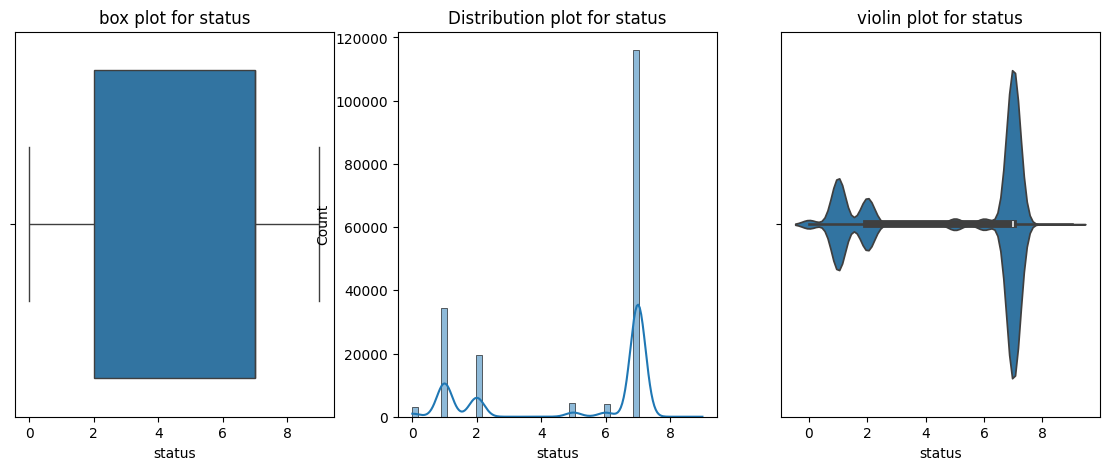

item type
skew: {-0.4875370675112151}


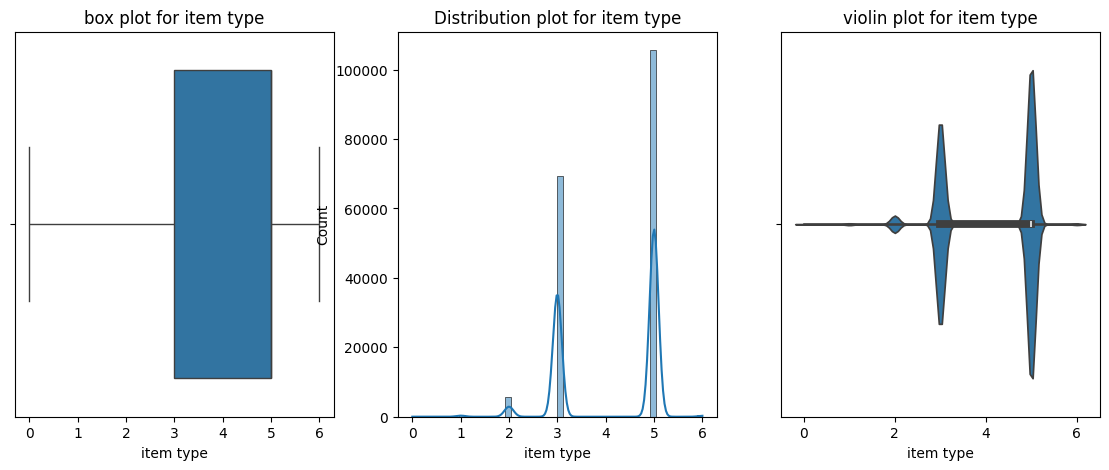

application
skew: {0.7245643807542177}


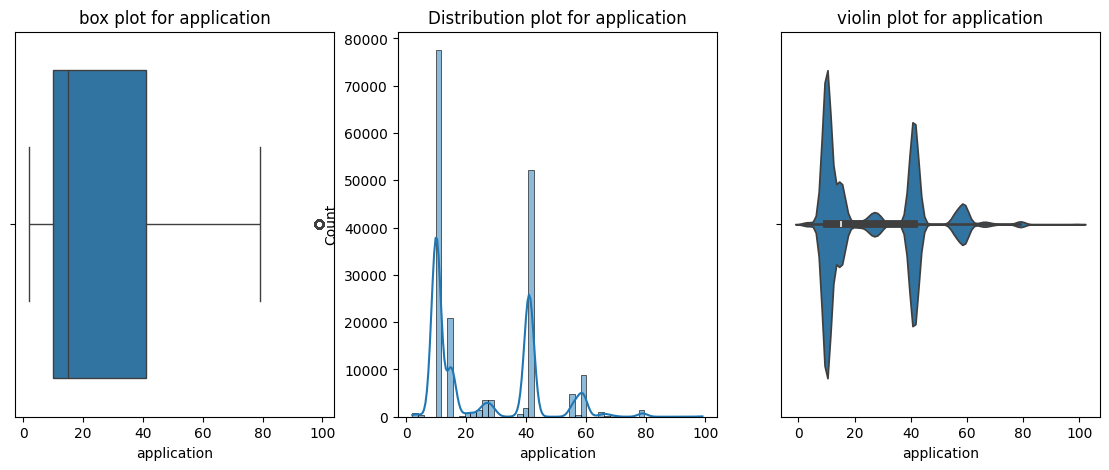

thickness
skew: {303.4475711614558}


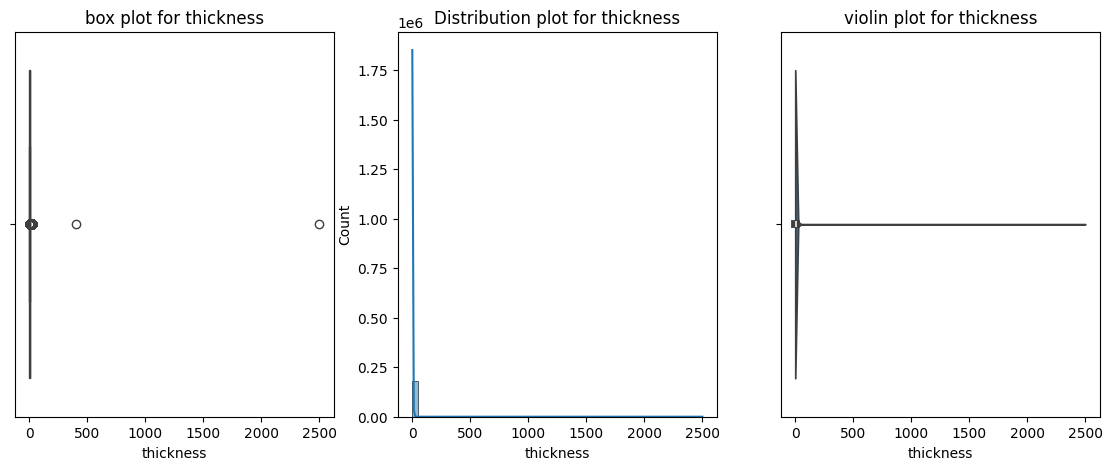

width
skew: {0.3745967719109581}


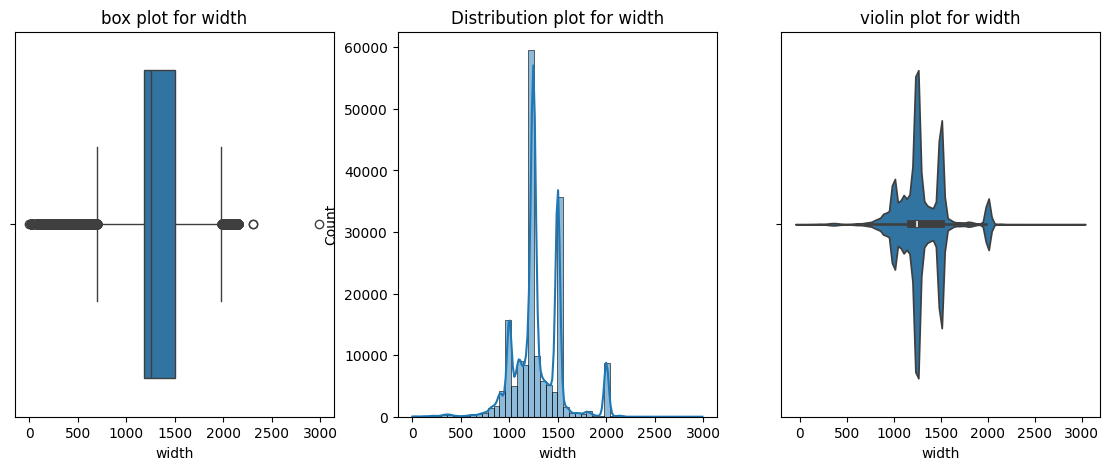

product_ref
skew: {1.0152155732872308}


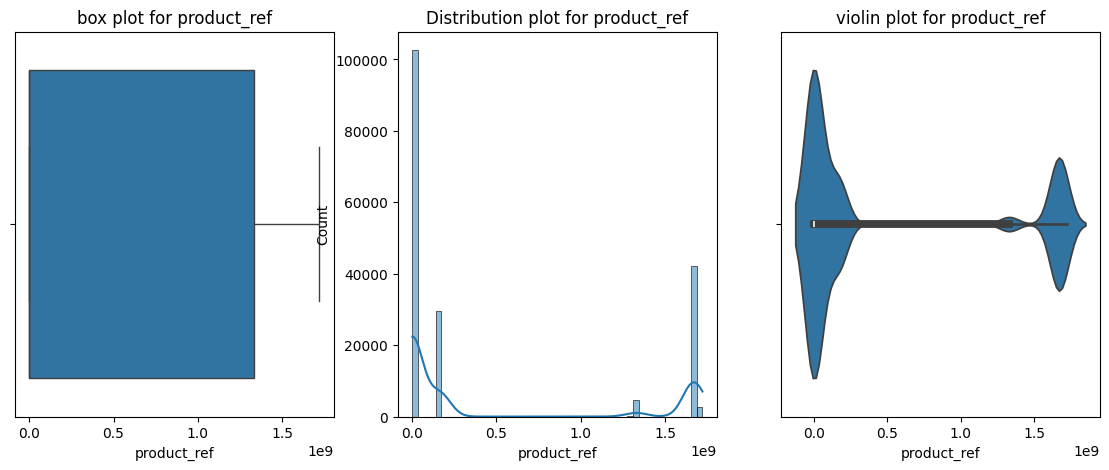

selling_price
skew: {301.3880879059445}


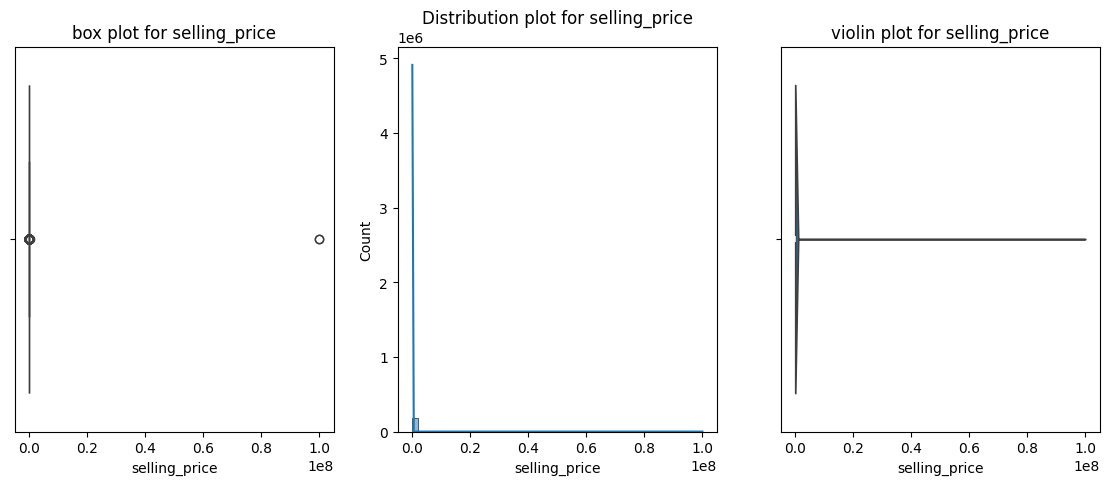

In [24]:
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int32', 'int64']).columns
for i in numeric_columns:
    plot(cleaned_data,i)

In [25]:
# in above plots 'selling price','quanity tons ' is highly skewed so make it in normal

list=[]
for i in cleaned_data['selling_price'].values:
    if i<=0:
        i=np.nan
        list.append(i)
    else:
        list.append(i)
cleaned_data['selling_price']=list

In [26]:

list1=[]
for item in cleaned_data['quantity tons'].values:
    if item<=0:
        item=np.nan
        list1.append(item)
    else:
        list1.append(item)
cleaned_data['quantity tons']=list1

In [27]:
cleaned_data.isnull().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [28]:
cleaned_data.dropna(inplace=True)

In [29]:
new_cleaned=cleaned_data.copy()

In [30]:
print(cleaned_data.columns)

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')


In [31]:
cleaned_data.columns = cleaned_data.columns.str.strip()

In [32]:
# to remove skewness so we use log tranformation(larger values into smaller values and toavoid 0 or negative values )
cleaned_data['quantity tons_log']=np.log(cleaned_data['quantity tons'])
cleaned_data['customer_log']=np.log(cleaned_data['customer'])
cleaned_data['thickness_log']=np.log(cleaned_data['thickness'])
cleaned_data['selling_price_log']=np.log(cleaned_data['selling_price'])
cleaned_data['product_ref_log']=np.log(cleaned_data['product_ref'])


In [33]:
cleaned_data.drop(['quantity tons','customer','thickness','selling_price','product_ref'],axis=1,inplace=True)

In [34]:
def plot(df2,column):
    df2 = df2.dropna(subset=[column])
    plt.figure(figsize=(14,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2, x=column)
    plt.title(f'box plot for {column}')
    print(f'{column}')
    print("skew:",{df2[column].skew()})

    plt.subplot(1,3,2)
    sns.histplot(data=df2, x=column, kde=True, bins=50)
    plt.title(f'Distribution plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2, x=column)
    plt.title(f'violin plot for {column}')
    plt.show()


quantity tons_log
skew: {-0.06876455880311855}


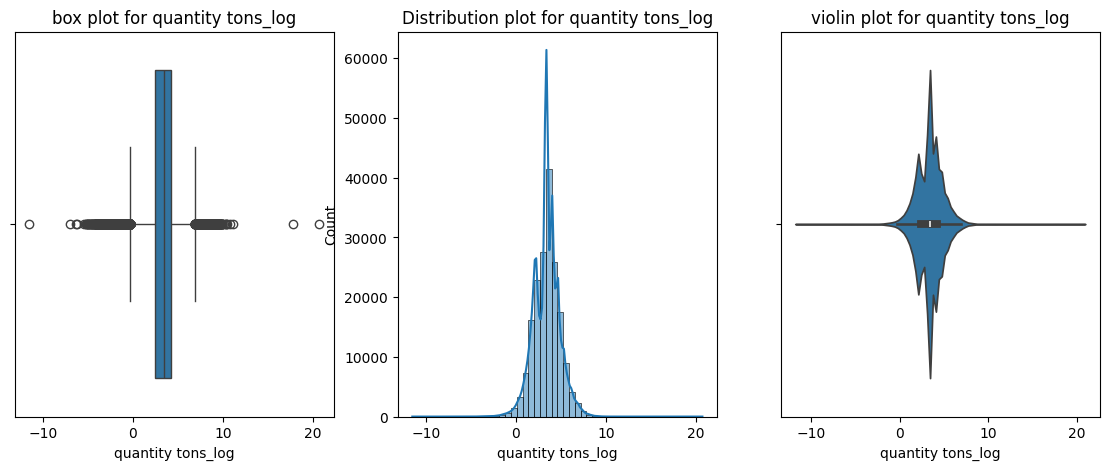

customer_log
skew: {53.14328410650396}


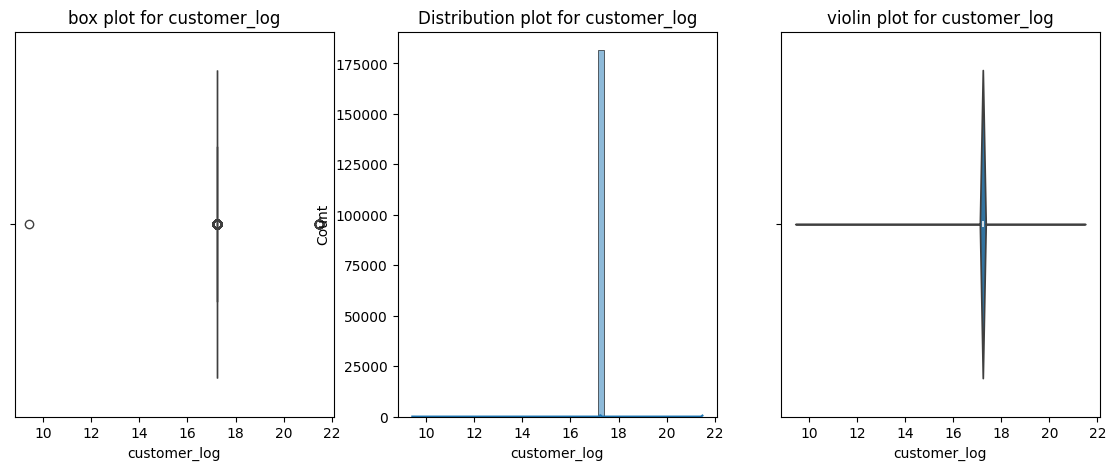

thickness_log
skew: {0.3490264319136993}


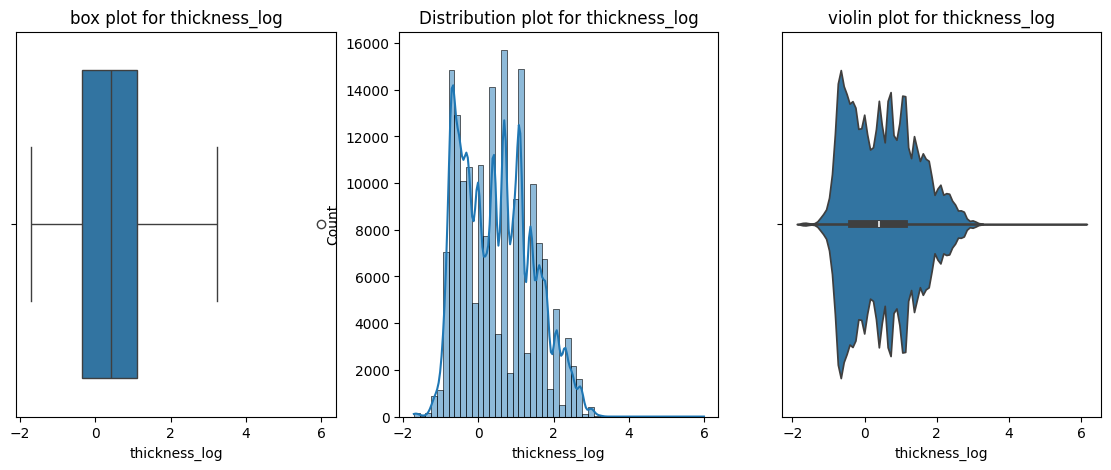

selling_price_log
skew: {-5.33539823694897}


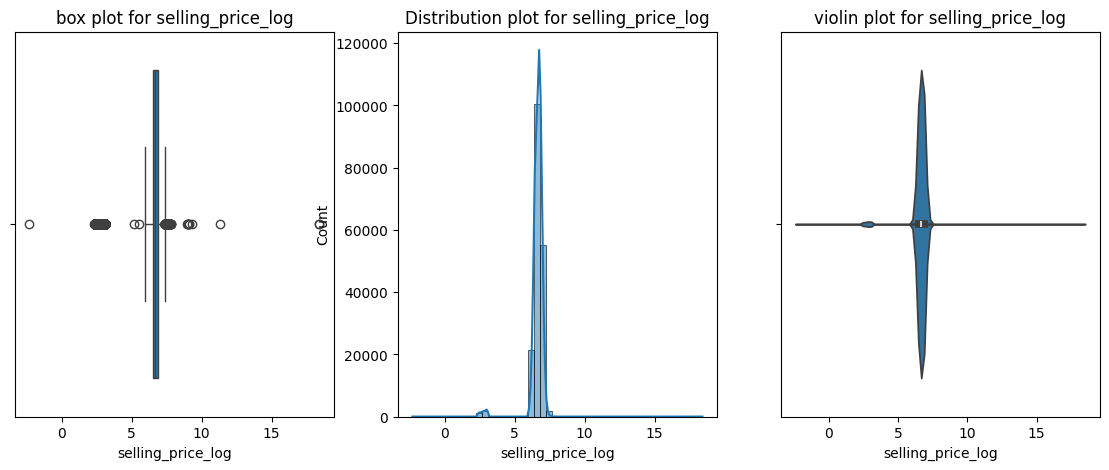

product_ref_log
skew: {0.38094044483598904}


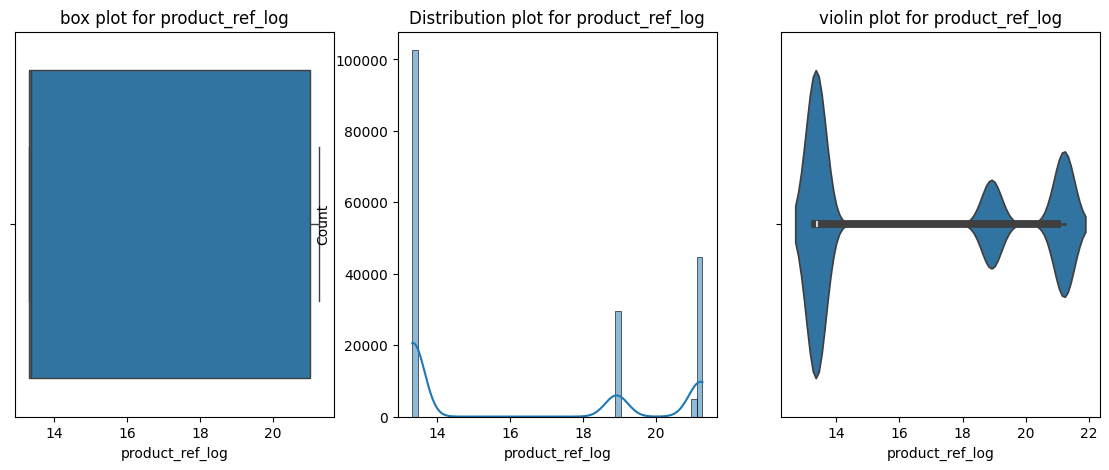

In [35]:
for i in ['quantity tons_log','customer_log','thickness_log','selling_price_log','product_ref_log']:
    plot(cleaned_data,i)

In [36]:
# to remove outliers using statistical methods
def outlier(df4,column):
    q1=df4[column].quantile(.25)
    q3=df4[column].quantile(.75)
    IQR=q1-q3
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    df4[column]=df4[column].clip(upper,lower)
    return df4


In [37]:
for i in ['quantity tons_log','customer_log','thickness_log','selling_price_log','product_ref_log']:
    df5=outlier(cleaned_data,i)

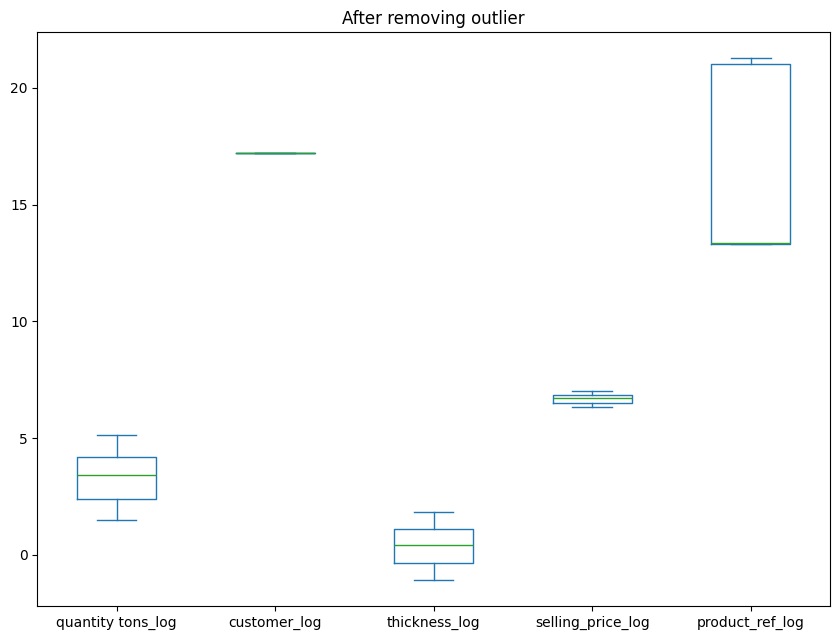

In [38]:
# let's check it whether the outlier removed or not using plot
plt.rcParams['figure.figsize']=[8.50,6.50]
plt.rcParams['figure.autolayout']=True
ax1=df5[['quantity tons_log','customer_log','thickness_log','selling_price_log','product_ref_log']].plot(kind='box',title='After removing outlier')
plt.show()

<Axes: >

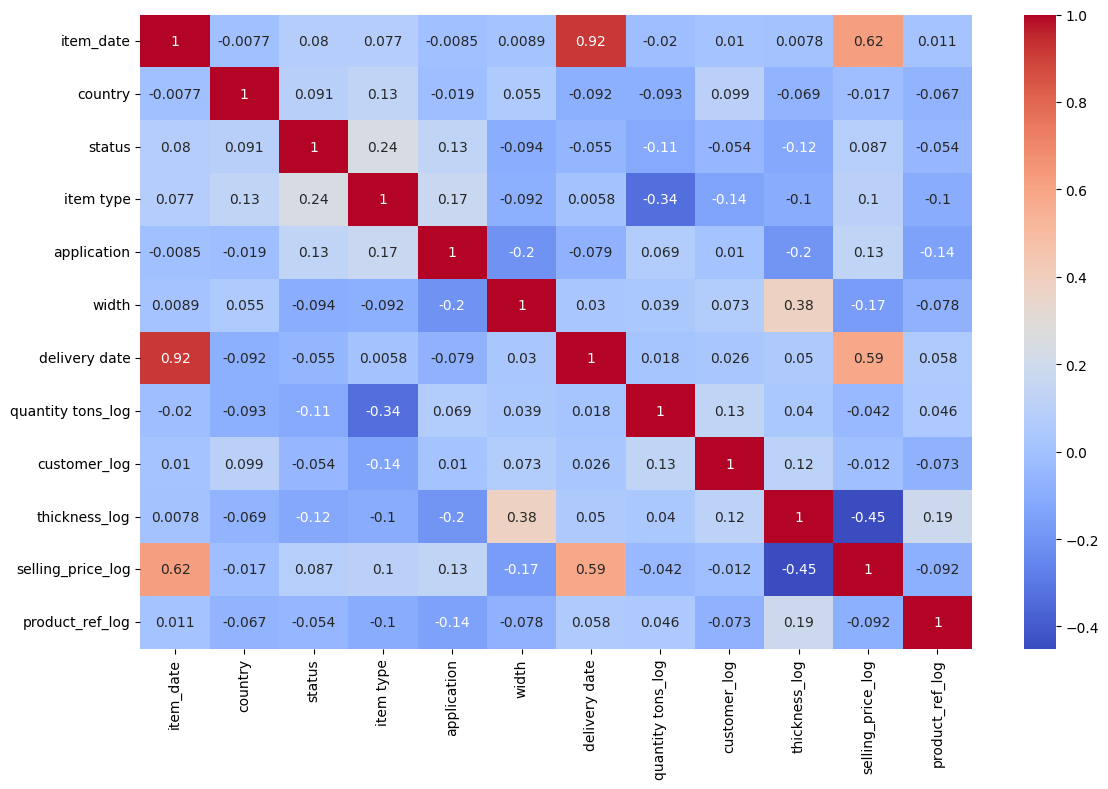

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_data.corr(),annot=True,cmap="coolwarm")

In [40]:
# High correlation between selling price and item date,delivery date 
cleaned_data1=cleaned_data.copy()

In [41]:
# let's convert date time into year month day separately
cleaned_data['item_date_year']=cleaned_data['item_date'].dt.year
cleaned_data['item_date_month']=cleaned_data['item_date'].dt.month
cleaned_data['item_date_day']=cleaned_data['item_date'].dt.day
cleaned_data['delivery_date_year']=cleaned_data['delivery date'].dt.year
cleaned_data['delivery_date_month']=cleaned_data['delivery date'].dt.month
cleaned_data['delivery_date_day']=cleaned_data['delivery date'].dt.day

In [42]:
#completed the preprocessing 
cleaned_data.drop(['item_date','delivery date'],axis=1,inplace=True)

In [43]:
cleaned_data

,country,status,item type,application,width,quantity tons_log,customer_log,thickness_log,selling_price_log,product_ref_log,item_date_year,item_date_month,item_date_day,delivery_date_year,delivery_date_month,delivery_date_day
0,28.0,7,5,10.0,1500.0,3.991779,17.221905,0.693147,6.749931,21.236568,2021,4,1,2021,7,1
1,25.0,7,5,41.0,1210.0,5.113018,17.223450,-0.223144,6.953684,21.235312,2021,4,1,2021,4,1
2,30.0,7,6,28.0,952.0,5.113018,17.221868,-0.967584,6.468211,13.350896,2021,4,1,2021,1,1
3,32.0,7,3,59.0,1317.0,5.113018,17.227393,0.832909,6.643790,21.235312,2021,4,1,2021,1,1
4,28.0,7,5,10.0,2000.0,5.113018,17.223735,1.386294,6.357842,13.370262,2021,4,1,2021,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,25.0,7,5,41.0,1240.0,4.670802,17.223381,-0.040822,6.400257,18.916240,2020,7,2,2020,7,1
181668,25.0,7,5,41.0,1220.0,4.629691,17.223381,-0.040822,6.381816,18.916240,2020,7,2,2020,7,1
181669,25.0,7,5,41.0,1500.0,5.113018,17.223381,-0.051293,6.378426,18.916240,2020,7,2,2020,7,1
181670,25.0,7,5,41.0,1250.0,1.489320,17.223381,-0.342490,6.428105,18.916240,2020,7,2,2020,7,1


In [44]:
# We have to select the model
# REGRESSION METHOD -PREDICT THE SELLING PRICE

# To get the dependent and independent variable separately
x=cleaned_data.drop(['selling_price_log'],axis=1)
y=cleaned_data['selling_price_log']


# Normalise the data using standard scalar
scalar=StandardScaler()
x=scalar.fit_transform(x)


In [45]:
# split the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [46]:
models=[('RandomForestRegressor',RandomForestRegressor()),
        ('DecisionTreeRegressor',DecisionTreeRegressor()),
        ('ExtraTreesRegressor',ExtraTreesRegressor()),
        ('GradientBoostingRegressor',GradientBoostingRegressor()),
        ('XGBRegressor',XGBRegressor())]


In [47]:
for name, model in models:
    print(name,":")
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print("r2_score:\n",r2_score(y_test,y_predict))
    print()
    print("mean_absolute_error:\n", mean_absolute_error(y_test,y_predict))
    print()
    print("mean_squared_error:\n",mean_squared_error(y_test,y_predict))
    print()
    



RandomForestRegressor :
r2_score:
 0.9608850922125851

mean_absolute_error:
 0.02554650761624305

mean_squared_error:
 0.0018607158756559457

DecisionTreeRegressor :
r2_score:
 0.9343689358984191

mean_absolute_error:
 0.030476091424467146

mean_squared_error:
 0.003122102794507851

ExtraTreesRegressor :
r2_score:
 0.9588684046484187

mean_absolute_error:
 0.025706179105712136

mean_squared_error:
 0.0019566507194059726

GradientBoostingRegressor :
r2_score:
 0.8886183710445397

mean_absolute_error:
 0.053963768657593496

mean_squared_error:
 0.005298480220897449

XGBRegressor :
r2_score:
 0.9440005316402975

mean_absolute_error:
 0.035894061432167265

mean_squared_error:
 0.002663922931162249



In [48]:
# from the above evaluation of results Random forest regressor model gives best result (0.9615459)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
Regression_model=RandomForestRegressor()
Regression_model.fit(x_train,y_train)
y_predict=Regression_model.predict(x_test)

#Evaluation metrics
r2_score=r2_score(y_test,y_predict)
print("r2_score:",r2_score)
MAE=mean_absolute_error(y_test,y_predict)
print("mean_absolute_error:",MAE)
MSE=mean_squared_error(y_test,y_predict)
print("mean_squared_error:",MSE)
RMSE=np.sqrt(MSE)
print("Root_mean_squared_error:",RMSE)



r2_score: 0.9630658972936221
mean_absolute_error: 0.025023723152306682
mean_squared_error: 0.0017375250428287292
Root_mean_squared_error: 0.04168363039406152


In [49]:
#Randomforest regressor gives good result with low errors 

In [50]:
# To store the model using pickling method
import pickle
# serializing
with open("Regression_model.pkl","wb") as f1:
    pickle.dump(Regression_model,f1)
with open("Scalar.pkl","wb") as f2:
    pickle.dump(scalar,f2)

In [51]:
# De serializing
with open("Regression_model.pkl","rb") as f3:
    R_model=pickle.load(f3)
with open("scalar.pkl","rb") as f4:
    scalar=pickle.load(f4)

In [52]:
# predict the data with sample inputs(unseen data pattern)
test1=np.array([[4.00000,25.00000,1023.90,20000.34,5.00000,6.98790,32.89201,2002.90,1.0,3829.00,45.000001,673.09,23.00000,7.0000,673.2000]])
test2=scalar.fit_transform(test1)
y_p_new=model.predict(test2)
print(y_p_new)

[6.3203287]


CLASSIFICATION MODEL-PREDICT STATUS WON/LOST

In [53]:
# classification model
new_cleaned_data=cleaned_data[(cleaned_data["status"]==1)|(cleaned_data["status"]==7)]
new_cleaned_data.status=new_cleaned_data.status.map({1:0,7:1})



In [54]:
new_cleaned_data.status.value_counts()

status
1    116002
0     34438
Name: count, dtype: int64

In [55]:
# We could see that data is imbalanced we make it as balanced data because model will learn it from majority so we have to use SMOTE (synthetic minority oversampling technique)
x=new_cleaned_data.drop("status",axis=1)
y=new_cleaned_data["status"]

In [56]:
y.value_counts()

status
1    116002
0     34438
Name: count, dtype: int64

In [57]:
#blance the data 
from imblearn.combine import SMOTETomek
x_new,y_new=SMOTETomek().fit_resample(x,y)

In [58]:
y_new.value_counts()

status
1    115192
0    115192
Name: count, dtype: int64

In [59]:
# balanced the data

In [60]:
#Train the classification model

scalar1=StandardScaler()
x_new=scalar1.fit_transform(x_new)
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2)

In [61]:
model1=[("DecisionTreeClassifier",DecisionTreeClassifier()),
       ("ExtraTreesClassifier",ExtraTreesClassifier()),
       ("RandomForestClassifier", RandomForestClassifier()),
       ("GradientBoostingClassifier",GradientBoostingClassifier()),
       ("XGBRFClassifier",XGBRFClassifier())]

#from sklearn.metrics import accuracy_score,auc,confusion_matrix,classification_report


In [62]:
for name,model2 in model1:
    print(name,":")
    model2.fit(x_train,y_train)
    y_pred=model2.predict(x_test)
    print("Accuracy_score",accuracy_score(y_test,y_pred))
    print()
    print("confusion_matrix",confusion_matrix(y_test,y_pred))
    print()
    print("classification_report",classification_report(y_test,y_pred))
    print()

DecisionTreeClassifier :
Accuracy_score 0.9629099116695965

confusion_matrix [[22143   810]
 [  899 22225]]

classification_report               precision    recall  f1-score   support

           0       0.96      0.96      0.96     22953
           1       0.96      0.96      0.96     23124

    accuracy                           0.96     46077
   macro avg       0.96      0.96      0.96     46077
weighted avg       0.96      0.96      0.96     46077


ExtraTreesClassifier :
Accuracy_score 0.9830501117694295

confusion_matrix [[22763   190]
 [  591 22533]]

classification_report               precision    recall  f1-score   support

           0       0.97      0.99      0.98     22953
           1       0.99      0.97      0.98     23124

    accuracy                           0.98     46077
   macro avg       0.98      0.98      0.98     46077
weighted avg       0.98      0.98      0.98     46077


RandomForestClassifier :
Accuracy_score 0.9804240727477918

confusion_matrix [[22678

In [63]:
# Extra treesclassifier gives best results because it has high accuracy compared to other 
# so we use the extra trees classifier 
classification=ExtraTreesClassifier()
classification.fit(x_train,y_train)
y_pre=classification.predict(x_test)


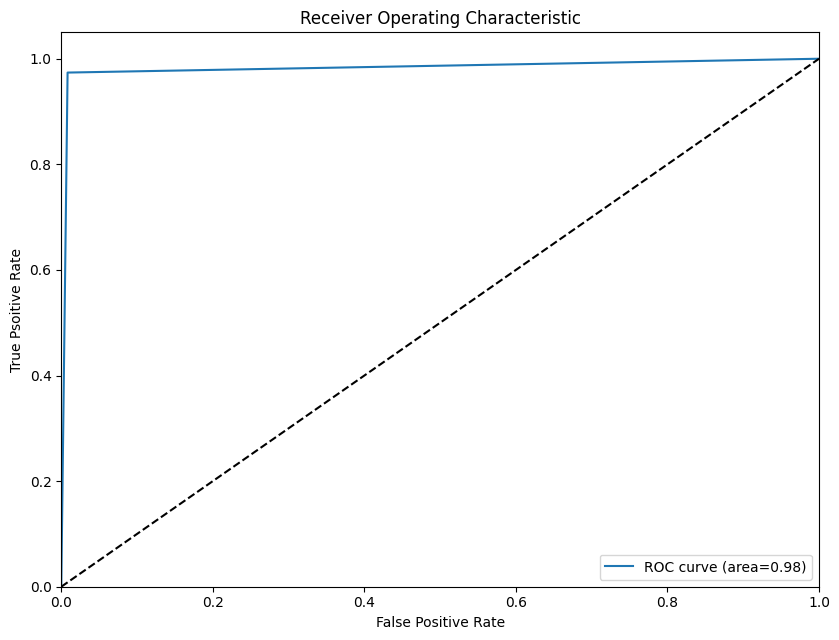

In [64]:
fpr,tpr,thresholds=roc_curve(y_test,y_pre)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Psoitive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


In [65]:
# serializing
with open("classification.pkl","wb") as f5:
    pickle.dump(classification,f5)
with open("scalar2.pkl","wb") as f:
    pickle.dump(scalar,f)


In [66]:
#de serializing
with open("classification.pkl","rb") as f7:
    c_model=pickle.load(f7)
with open("scalar2.pkl","rb")as f8:
    scalar=pickle.load(f8)


In [67]:
test=np.array([[77.0,3.0,44.0,2012.0,1.0,17.0000,np.log(225.0),np.log(39.0459),np.log(1225.0),np.log(392.0000),np.log(62.0000),830.09,410.90,78.00,9.0]])
new=scalar.fit_transform(test)
y_p=c_model.predict(new)
if y_p==1:
    print("WON")
else:
    print("LOST")


LOST


In [68]:
test2=np.array([[77.0,3,10.0,1500.0,np.log(39.553513),np.log(1225.0),np.log(30165992.0),np.log(1.0),np.log(164141591),2021,4,1,2021,8,1]])
new1=scalar.fit_transform(test2)
y_p1=c_model.predict(new1)
if y_p1==1:
    print("WON")
else:
    print("LOST")

LOST


In [69]:
# Both classification and regression model have done 